# Agrupamentos (clustering)

Aplicações:

- Segmentação de mercado: agrupamento de consumidores baseados em suas características ou comportamentos de consumo para recomendações personalizadas ou marketing direcionado.

- Segmentação de documentos: agrupamento de teses, artigos podem facilitar a definição e identificação de áreas de pesquisa ou de grupos de pesquisa.

- Segmentação de redes sociais

- Segmentação de imagens

- Detecção de anomalias

- Medicina: identificação de grupos diferentes de compostos em exames de imagens chamando atenção para possíveis anomalias

- Astronomia: identificação de corpos celestes

- Planejamento urbano: controle de tráfico ou planejamento de divisão de processos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.stats import skew

import cv2

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## K-Means (Por centróides)

Como separar os pontos no gráfico abaixo?

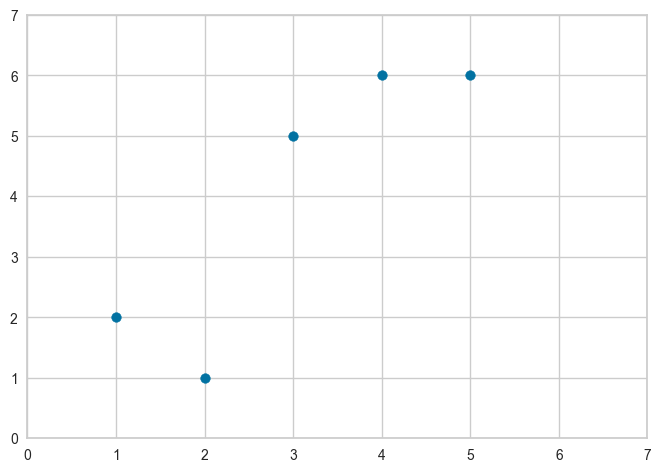

In [2]:
x_points = [2,4,3,1,5]
y_points = [1,6,5,2,6]

plt.scatter(x_points, y_points)
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Primeiro escolha dois pontos aleatórios.

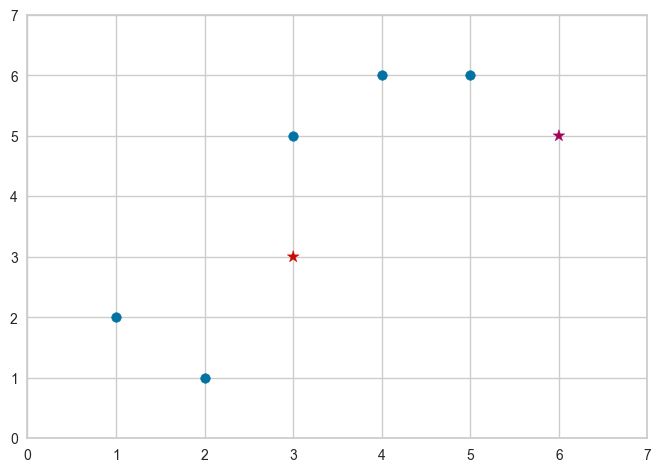

In [3]:
plt.scatter(x_points, y_points)
plt.scatter([3,6], [3,5], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Separe os grupos por proximidade aos pontos escolhidos.

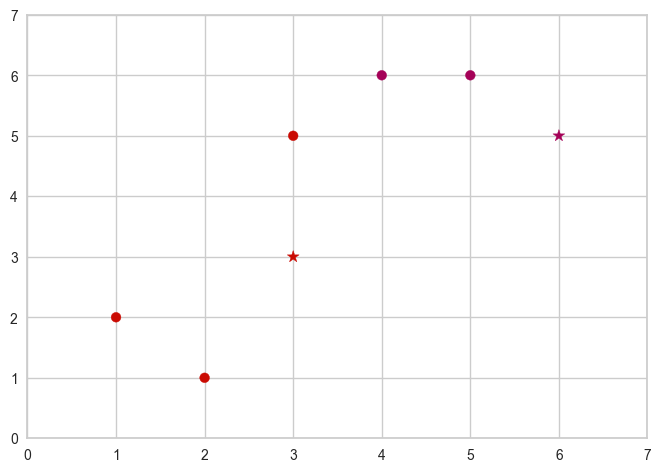

In [4]:
colors = []
for x,y in zip(x_points, y_points):
    if np.linalg.norm(np.array([x,y]) - np.array([3,3])) < np.linalg.norm(np.array([x,y]) - np.array([6,5])):
        colors.append('r')
    else:
        colors.append('m')

plt.scatter(x_points, y_points, color=colors)
plt.scatter([3,6], [3,5], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Calcule o centroíde de cada grupo e então mude os pontos escolhidos para esses centroides.

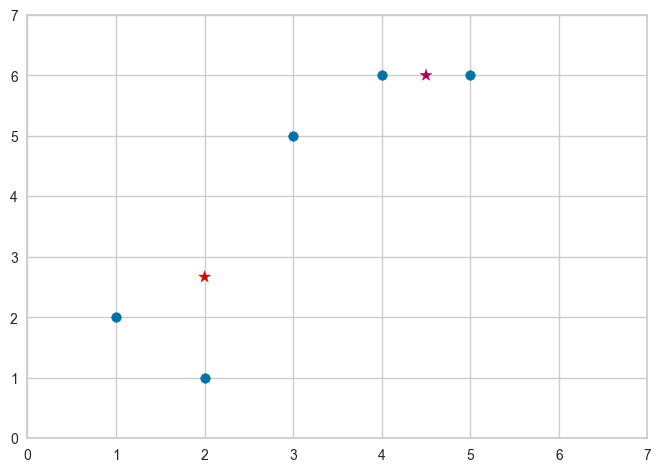

In [5]:
c1 = np.array([6/3, 8/3])
c2 = np.array([9/2, 12/2])

plt.scatter(x_points, y_points)
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Separe novamente os grupos por proximidade com os novos centróides.

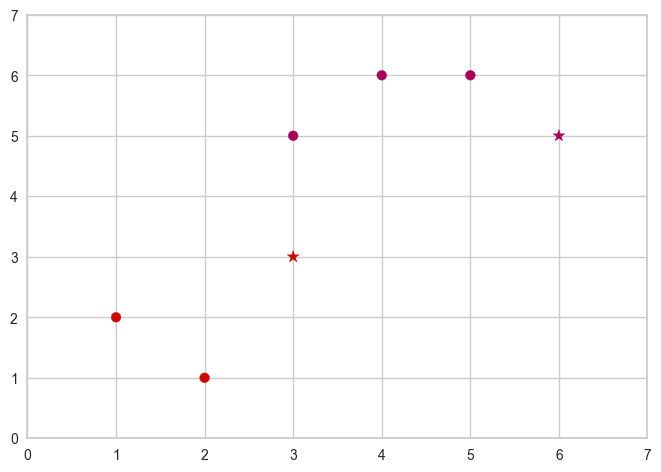

In [6]:
colors = []
for x,y in zip(x_points, y_points):
    if np.linalg.norm(np.array([x,y]) - c1) < np.linalg.norm(np.array([x,y]) - c2):
        colors.append('r')
    else:
        colors.append('m')

plt.scatter(x_points, y_points, color=colors)
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Recalcule os centróides por grupo e troque os centróides antigos pelos novos.

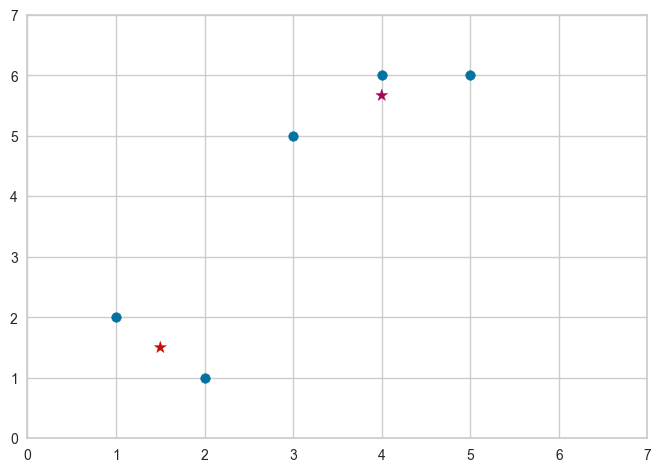

In [7]:
c1 = np.array([3/2, 3/2])
c2 = np.array([12/3, 17/3])

plt.scatter(x_points, y_points)
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Continue com o processo até os centróides não mais se alterarem (caso isso ocorra), como é o caso acima!!! 

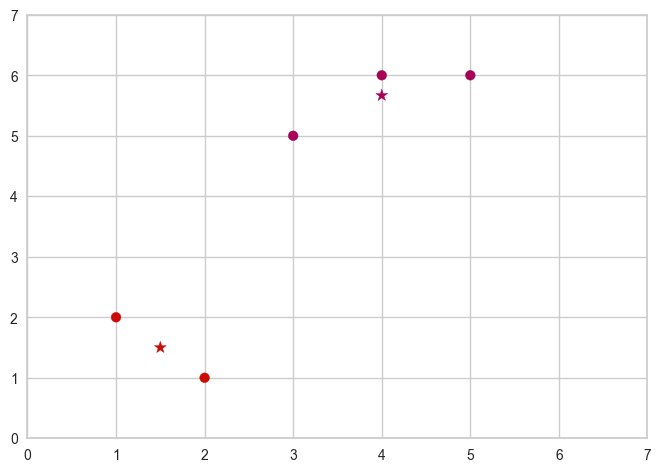

In [8]:
plt.scatter(x_points, y_points, color=['r','m','m','r','m'])
plt.scatter([c1[0], c2[0]], [c1[1], c2[1]], color=['r','m'], s=80, marker='*')
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

In [9]:
X = np.array([[2, 1], [4, 6], [3, 5], [1, 2], [5, 6]])
kmeans = KMeans(
    n_clusters=2, 
    random_state=0, 
    n_init="auto"
)

kmeans.fit(X)

print("Groups", kmeans.labels_)
print("Centers", kmeans.cluster_centers_)

Groups [1 0 0 1 0]
Centers [[4.         5.66666667]
 [1.5        1.5       ]]


<b>Importante:</b> Observe que utilizamos a distância euclideana, mas poderíamos ter usado outras métricas e medidas de similaridade para calcular as distâncias.

Ao tomar novos pontos, para classificá-los por cluster, basta ver de qual centróide ele se aproxima mais.

In [1]:
kmeans.predict(np.array([[2,2]]))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3492345573.py, line 1)

## DBSCAN (Por densidade)

Vejamos outro tipo de cluster, considere os pontos abaixo.

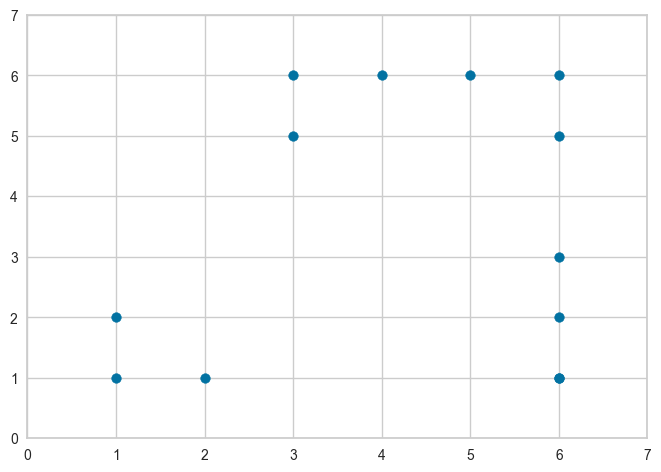

In [5]:
x_points = [2,4,3,1,5,1,3,6,6,6,6,6,6]
y_points = [1,6,5,2,6,1,6,1,1,2,3,5,6]

plt.scatter(x_points, y_points)
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Agrupe os pontos que estejam uma distância $\epsilon = 1$ uns dos outros e que tenham pelo menos 2 pontos satisfazendo isso, com a métrica de Manhattan.

In [6]:
X = np.array([[x,y] for x,y in zip(x_points, y_points)])

dbscan = DBSCAN(
    eps=1, 
    min_samples=2, 
    metric="manhattan"
).fit(X)

print("Groups", dbscan.labels_)

Groups [0 1 1 0 1 0 1 2 2 2 2 1 1]


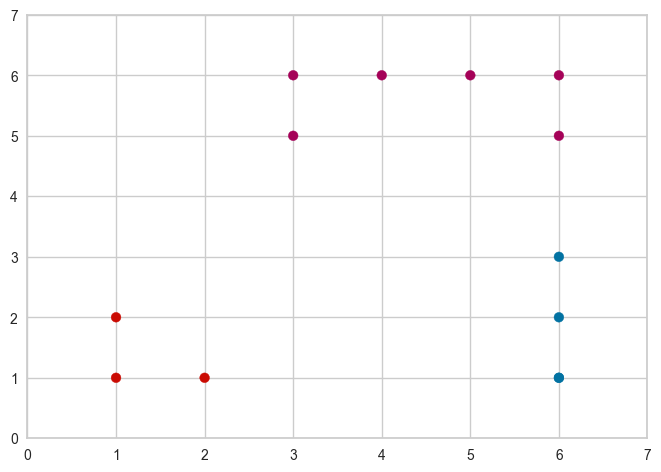

In [7]:
map_colors = {0: 'r', 1: 'm', 2: 'b'}

plt.scatter(x_points, y_points, color=list(map(lambda x: map_colors[x], dbscan.labels_)))
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

Agrupe os pontos que estejam uma distância $\epsilon = 2$ uns dos outros e que tenham pelo menos 2 pontos satisfazendo isso, com a métrica de Manhattan.

In [8]:
from sklearn.cluster import DBSCAN

X = np.array([[x,y] for x,y in zip(x_points, y_points)])

dbscan = DBSCAN(
    eps=2, 
    min_samples=2, 
    metric="manhattan").fit(X)

print("Groups", dbscan.labels_)

Groups [0 1 1 0 1 0 1 1 1 1 1 1 1]


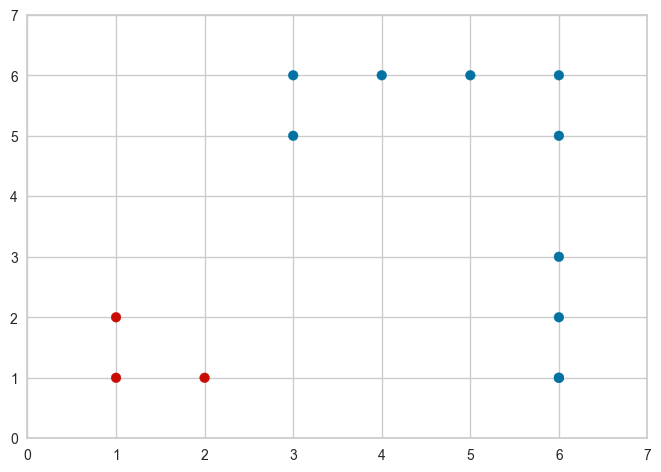

In [9]:
map_colors = {0: 'r', 1: 'b', 2: 'b'}

plt.scatter(x_points, y_points, color=list(map(lambda x: map_colors[x], dbscan.labels_)))
plt.xlim([0,7])
plt.ylim([0,7])
plt.show()

DBSCAN é usado para detectar pontos isolados (detecção de anomalia):

In [10]:
from sklearn.cluster import DBSCAN

x_points = [2,4,3,1,5,1,3,6,6,6,6,6,6,1]
y_points = [1,6,5,2,6,1,6,1,1,2,3,5,6,7]

X = np.array([[x,y] for x,y in zip(x_points, y_points)])
dbscan = DBSCAN(eps=2, min_samples=2, metric="manhattan").fit(X)

print("Groups", dbscan.labels_)

Groups [ 0  1  1  0  1  0  1  1  1  1  1  1  1 -1]


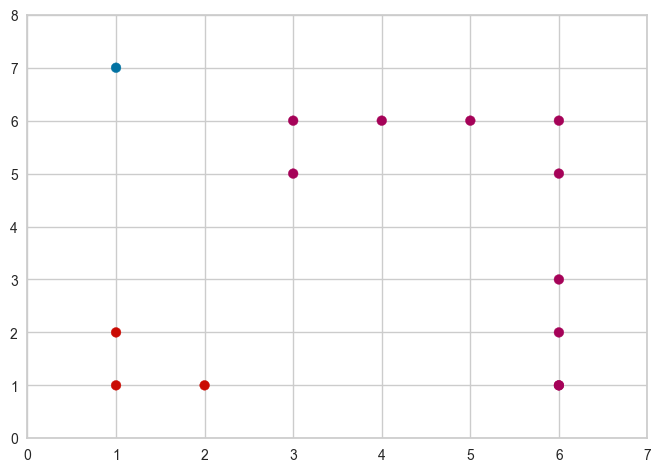

In [17]:
map_colors = {0: 'r', 1: 'm', -1: 'b'}

plt.scatter(x_points, y_points, color=list(map(lambda x: map_colors[x], dbscan.labels_)))
plt.xlim([0,7])
plt.ylim([0,8])
plt.show()

## Aglomerativo (hierárquico)

O código abaixo foi adaptado do site https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

Suponha que queremos agrupar cidades para distribuição de grupos de trabalhos por geolocalização. Vamos escolher 4 cidades do Triângulo mineiro e Alto Paranaíba. Suponha que elas estejam dispostas como no gráfico abaixo.

<img width="400px" src="../assets/dist_cidades.png">

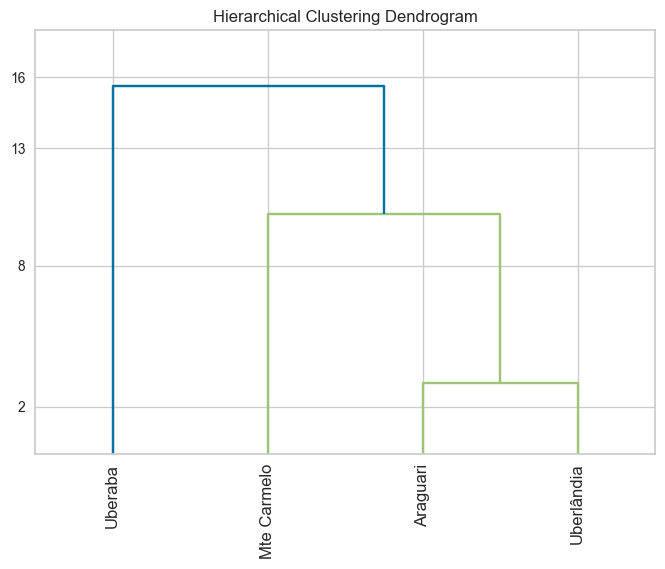

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = np.array([[-3,0],[0,0],[10,0],[-2,10]])


model = AgglomerativeClustering(
    distance_threshold=0, # zero para mostrar toda a árvore
    metric='euclidean', # novamente consideramos uma métrica específica
    linkage='complete', # agrupa pela distância do máximo entre clusters
    n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
              
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xticks(np.array([5,15,25,35]), ['Uberaba','Mte Carmelo', 'Araguari', 'Uberlândia'], rotation=90) # 2, 3, 0, 1
plt.ylim([0,18])
plt.yticks([2,8,13,16])
plt.gca().yaxis.grid(True)
plt.show()

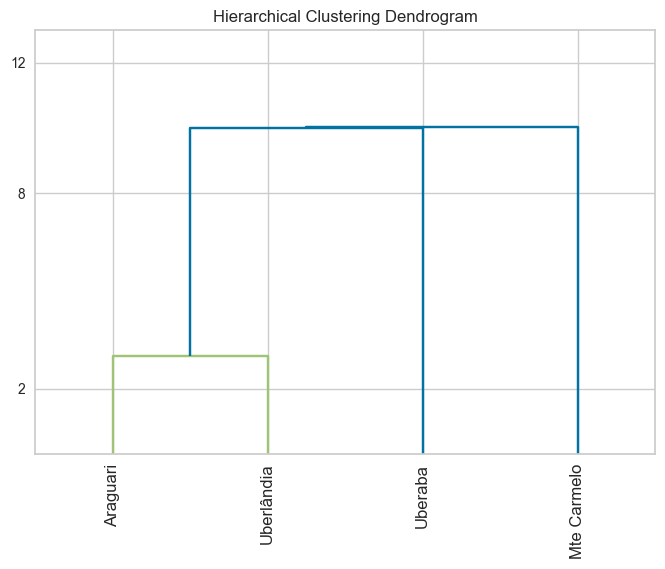

In [19]:
X = np.array([[-3,0],[0,0],[10,0],[-2,10]])


model = AgglomerativeClustering(
    distance_threshold=0, # zero para mostrar toda a árvore
    metric='euclidean', # novamente consideramos uma métrica específica
    linkage='single', # agrupa pela distância do mínimo entre clusters
    n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
              
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xticks(np.array([5,15,25,35]), ['Araguari', 'Uberlândia', 'Uberaba','Mte Carmelo'], rotation=90) # 0,1,2,3
plt.ylim([0,13])
plt.yticks([2,8,12])
plt.gca().yaxis.grid(True)
plt.show()

## Por que usar Clustering???

Podemos melhorar tarefas de classificação ou de regressão supervisionada acrescentando variáveis de grupos em alguns casos. Considere o seguinte pipeline de avaliação do modelo de Regressão Linear para o Housing Prices Dataset:

In [11]:
# read
df = pd.read_csv("../datasets/housing_prices/train.csv")

# drop id
df.drop('Id', axis=1, inplace=True)

# remove skew
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df[skewed_feats] = np.log1p(df[skewed_feats])

# get dummies
df = pd.get_dummies(df)

# fill nan's
df = df.fillna(df.mean())

# split train and test
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mean_absolute_error(y_pred, y_test)

0.12123323149069146

Mudaremos o pipeline adicionando uma coluna com agrupamentos obtidos pelo Kmeans.

In [14]:
# read
df = pd.read_csv("../datasets/housing_prices/train.csv")

# drop id
df.drop('Id', axis=1, inplace=True)

# remove skew
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df[skewed_feats] = np.log1p(df[skewed_feats])

# get dummies
df = pd.get_dummies(df)

# fill nan's
df = df.fillna(df.mean())

# create kmeans columns
kmeans = KMeans(
    n_clusters=4, 
    random_state=0, 
    n_init="auto")
kmeans.fit(df.drop('SalePrice', axis=1))
df['kmeans'] = kmeans.labels_

# split train and test
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mean_absolute_error(y_pred, y_test)

0.12056122651045006

Observe que o erro absoluto médio ao considerar uma variável nova formada pelos agrupamentos obtidos pelo K-means é menor do que o erro sem o Kmeans.

## Silhouete e Elbow

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
- https://vitalflux.com/elbow-method-silhouette-score-which-better/

Escolhendo o número de clusterings com Silhouete e Elbow

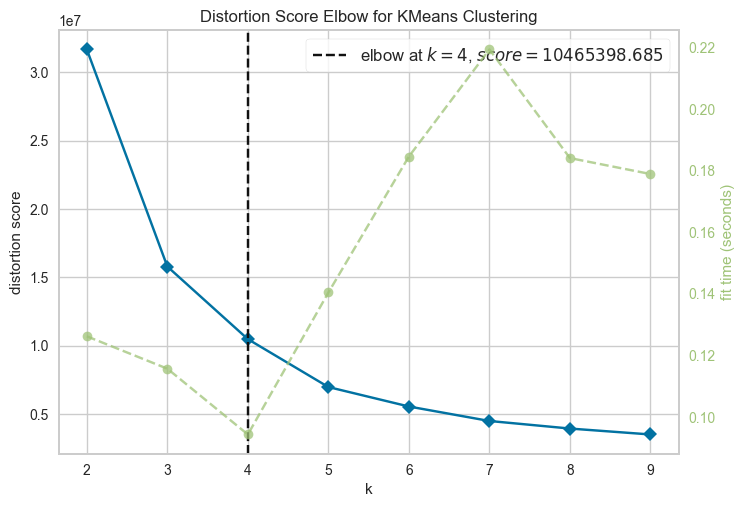

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
km = KMeans(random_state=0, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

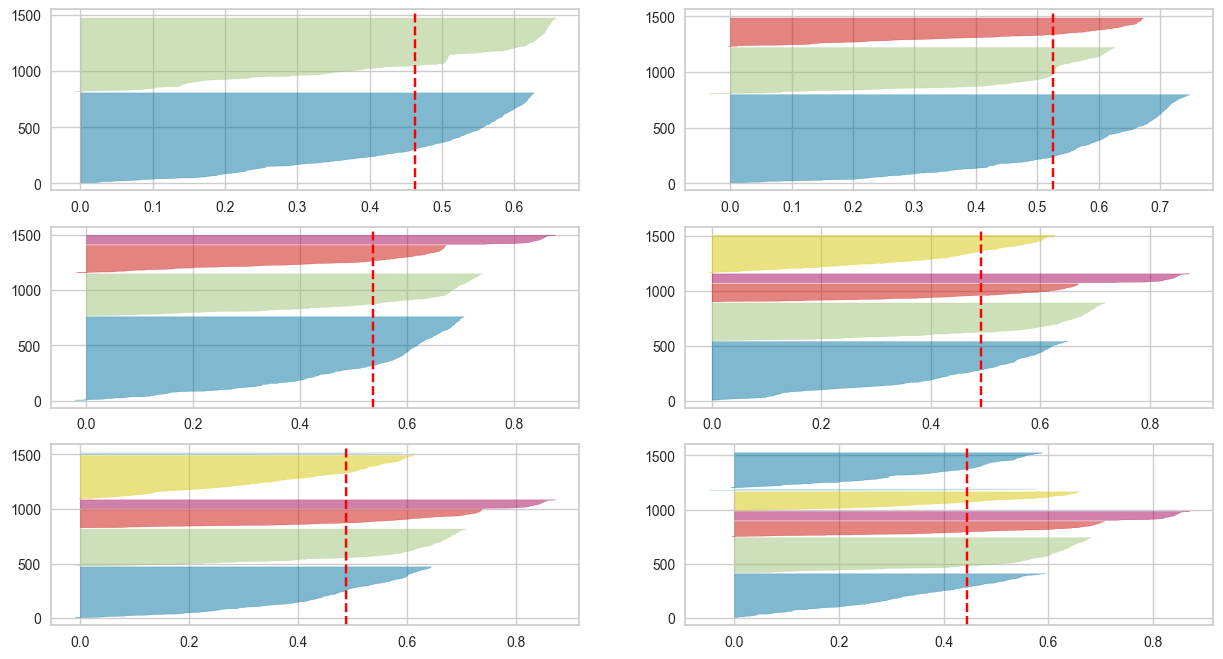

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:

    km = KMeans(n_clusters=i, n_init=10, random_state=0)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

In [15]:
# read
df = pd.read_csv("../datasets/housing_prices/train.csv")

# drop id
df.drop('Id', axis=1, inplace=True)

# remove skew
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df[skewed_feats] = np.log1p(df[skewed_feats])

# get dummies
df = pd.get_dummies(df)

# fill nan's
df = df.fillna(df.mean())

# create kmeans columns
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
kmeans.fit(df.drop('SalePrice', axis=1))
df['kmeans'] = kmeans.labels_

# split train and test
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mean_absolute_error(y_pred, y_test)

0.12056122651045006

In [16]:
# read
df = pd.read_csv("../datasets/housing_prices/train.csv")

# drop id
df.drop('Id', axis=1, inplace=True)

# remove skew
numeric_feats = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df[skewed_feats] = np.log1p(df[skewed_feats])

# get dummies
df = pd.get_dummies(df)

# fill nan's
df = df.fillna(df.mean())

# create kmeans columns
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(df.drop('SalePrice', axis=1))
df['kmeans'] = kmeans.labels_

# split train and test
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# train
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
mean_absolute_error(y_pred, y_test)

0.12002287975059263

## Segmentação de imagem

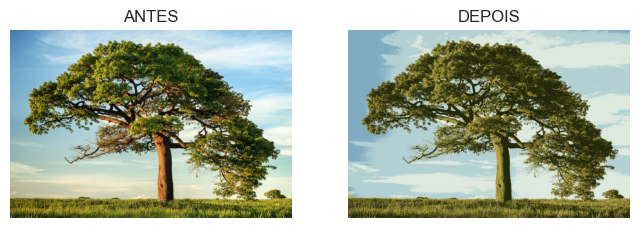

In [19]:
# !pip install opencv-python

# lendo a imagem BGR
image = cv2.imread("../assets/tree.jpg")
# convertendo para RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# transformando para 2D array de pixels e 3 core (RGB)
pixel_values = image.reshape((-1, 3))
# convertendo para float
pixel_values = np.float32(pixel_values)
# critério de paradas para o k-means
criteria = (
    cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 
    100, 0.2)
# numero de clusters
k = 6
# aplicando kmeans
_, labels, (centers) = cv2.kmeans(
    pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convert back to 8 bit values
centers = np.uint8(centers)
# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the images
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.grid('off')
plt.title("ANTES")
plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.axis('off')
plt.grid('off')
plt.title("DEPOIS")
plt.show()

- https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

# Outros algoritmos de agrupamento

- https://scikit-learn.org/stable/modules/clustering.html